<img src="water_pollution3.jpg"  style="width:100%; height:auto;">



# 🌍 Water Pollution & Disease Outbreaks: Can We Predict the Cost of Inaction?

Water pollution is not just an environmental issue, it is a public health emergency.

This data analysis project explores the relationship between water quality indicators and disease outbreaks across different regions and 

time periods. We will investigate whether patterns in water pollution can help predict and prevent public health crises, and estimate the 

economic impact of inaction.

We will follow a data-driven approach involving:

- Structured ETL (Extract, Transform, Load)

- Statistical analysis and pattern detection

- Visual exploration

- Hypothesis testing

- Economic impact and Health Burden Index estimation. Machine learning.


## ETL Process

Before go straight into the analysis, we want to ensure our dataset is clean and ready.

The ETL steps will include:

- **Extract**: Move the dataset from the Downloads folder to a project directory (`raw_data/`)

- **Statistics Table**: Create a summary of the most relevant statistics.

- **Transform**: Clean the data, check for outliers, and standardise formats

- **Load**: Summarise and prepare the cleaned dataset for analysis


## Data Extraction

The raw dataset was initially stored in the local `Downloads` folder. As part of the extraction step, the file was programmatically moved 

into a dedicated `raw_data` directory within the project structure. This ensures better file organisation, version control, and 

reproducibility for the data pipeline.


In [14]:
import os
import shutil
%matplotlib inline
import matplotlib.pyplot as plt

#Step 1 Define paths
downloads_path = os.path.expanduser("~/Downloads")
source_file = os.path.join(downloads_path, "water_pollution_disease.csv")
destination_folder = "raw_data"
destination_file = os.path.join(destination_folder, "water_pollution_disease.csv")

# Step 2 Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

#Step 3 Move the file
if os.path.exists(source_file):
    shutil.move(source_file, destination_file)
    print(f"✅ File moved to: {destination_file}")
else:
    print("❌ Source file not found.")


❌ Source file not found.


## Table of Statisticis. Why Is the Summary Statistics Table Important?

Before diving into visualisation or modelling, it is critical to understand the **basic structure and distribution** of the data. The 

summary statistics table helps us:

####  Spot Trends and Ranges

- Measures like **mean**, **median**, **min**, and **max** show the typical values and range for each variable, helping us understand 

scale and variation.

####  Detect Skewed Data

- **Skewness** tells us whether the distribution is symmetrical or lopsided. For example, disease rates or contaminant levels may be 

heavily skewed in certain regions.

#### Identify Outliers and Heavy Tails

- **Kurtosis** shows if a variable has more extreme values than a normal distribution, which is crucial when working with public health 

or environmental data where outliers might signal crises.

#### Validate Assumptions

- Summary statistics can confirm if the data matches expectations (e.g. pH levels within safe biological limits, reasonable GDP values).

Together, these metrics guide decisions on:

- Which features may need transformation

- Which variables could drive meaningful insights

- Whether data normalisation or outlier handling is required

In short, the statistical summary builds a **foundation of trust** in the dataset and helps define the right next steps.


In [15]:
import pandas as pd
from scipy.stats import skew, kurtosis


#Step 4 Load data
df = pd.read_csv(os.path.join(destination_folder, "water_pollution_disease.csv"))

#Step 5 Select numeric columns
num_df = df.select_dtypes(include='number')

#Step 6 Summary table
summary_stats = pd.DataFrame({
    'Mean': num_df.mean(),
    'Median': num_df.median(),
    'Std Dev': num_df.std(),
    'Min': num_df.min(),
    'Max': num_df.max(),
    'Skewness': num_df.apply(skew),
    'Kurtosis': num_df.apply(kurtosis)
})

summary_stats.round(2)


,Mean,Median,Std Dev,Min,Max,Skewness,Kurtosis
Year,2012.01,2012.00,7.23,2000.00,2024.00,0.00,-1.21
Contaminant Level (ppm),4.95,4.95,2.86,0.00,10.00,0.00,-1.16
pH Level,7.26,7.28,0.72,6.00,8.50,-0.02,-1.21
Turbidity (NTU),2.48,2.46,1.42,0.00,4.99,0.05,-1.16
Dissolved Oxygen (mg/L),6.49,6.49,2.03,3.00,10.00,0.02,-1.23
Nitrate Level (mg/L),25.08,24.79,14.51,0.05,49.99,0.02,-1.21
Lead Concentration (µg/L),10.05,10.07,5.80,0.00,20.00,-0.02,-1.22
Bacteria Count (CFU/mL),2488.48,2469.00,1431.42,0.00,4998.00,0.01,-1.19
Access to Clean Water (% of Population),64.61,64.78,20.31,30.01,99.99,0.02,-1.22
"Diarrheal Cases per 100,000 people",249.78,248.00,144.11,0.00,499.00,0.01,-1.19


## Initial Data Insights

This statistical summary provides a foundational understanding of the dataset before deeper analysis. Here's what stands out:

####  Central Tendencies & Spread

- Most variables show **well-centred mean and median values**, suggesting balanced distributions.

- Standard deviations vary widely. For instance, GDP per Capita and Bacteria Count have very high variance, indicating large disparities 

between regions.

####  pH Level Check

- The pH levels range from **6.00 to 8.50**, which is **within or close to safe biological thresholds** (6.5–8.5 for drinkable water), 

with a mean of 7.26. This will be important in health correlation checks.

####  Skewness & Kurtosis

- All skewness values are very close to 0 → **no major skew detected**.

- All kurtosis values are negative and near -1.2, indicating **light tails** (less extreme outliers than a normal distribution).

#### Red Flags

- Some variables like `Diarrheal Cases`, `Cholera Cases`, and `Bacteria Count` have **minimums at 0**, which might suggest 

under-reporting or areas with no observed cases. Maybe we will need to keep this in mind during hypothesis testing.


##  Data Cleaning & Transformation

To ensure precise and trustworthy analysis, the dataset will be cleaned and validated. This includes trimming whitespace from column 

names, removing duplicate rows, and verifying that all values fall within expected ranges, such as pH levels, percentage fields, and 

non-negative numeric values. Although the dataset was already well-structured with no missing values, these checks will help confirm its 

integrity and detect any potential anomalies before proceeding with exploration and hypothesis testing.


In [16]:
# Step 6. Check for missing values
missing = df.isnull().sum()
print("🔍 Missing values:\n", missing[missing > 0])

# Step 7. Strip whitespace from column names
df.columns = df.columns.str.strip()

# Step 8. Check for duplicates and drop if any
df.drop_duplicates(inplace=True)

# Step 9. Validate and fix data ranges

# Step 10. Negative values check
num_neg = df.select_dtypes(include='number') < 0
if num_neg.any().any():
    print(" Warning: Negative values detected.")

# Step 11. Check pH levels out of range
out_of_range_pH = df[(df['pH Level'] < 6.5) | (df['pH Level'] > 8.5)]
if not out_of_range_pH.empty:
    print(" Warning: pH Level out of biological range (6.5–8.5).")

# Step 12. Ensure percentage-based columns are between 0–100
percent_cols = [col for col in df.columns if '%' in col]
for col in percent_cols:
    if not df[col].between(0, 100).all():
        print(f" Warning: '{col}' has values outside 0–100%.")

# Step 13. Convert year to datetime if needed (for time series)
if 'Year' in df.columns:
    df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')

print(" Dataset cleaned and ready for analysis.")


🔍 Missing values:
 Water Treatment Method    747
dtype: int64
 Dataset cleaned and ready for analysis.


### Cleaning Observations

- **Missing Values**: 

  One column, `Water Treatment Method`, had **747 missing entries**. Since this variable may be useful for later classification or 
  
  filtering, we will retain the column and handle the missing values during the modelling process.

- **pH Level Validation**: 

  Some values in the `pH Level` column fell **outside the safe biological range (6.5–8.5)**. These may indicate sampling errors or highly 
  
  contaminated sources and may be flagged or excluded during analysis depending on their influence.

✅ With duplicates removed, column names standardised, and ranges validated, the dataset is now ready for visual exploration and 

hypothesis testing.


## Save, Move & Load

After cleaning, the dataset we will save as a new file and moved into the `input_data` folder. This separation ensures a clear 

distinction between raw and processed data, improving project structure and reproducibility. The cleaned dataset is then reloaded from 

this directory to begin the analysis phase with a reliable, validated dataset.


In [17]:
# Step 14. Create the input_data folder if it doesn't exist
input_data_folder = "input_data"
os.makedirs(input_data_folder, exist_ok=True)

# Step 15. Define cleaned file path
cleaned_file_path = os.path.join(input_data_folder, "cleaned_water_pollution_disease.csv")

# Step 16. Save the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Cleaned dataset saved to: {cleaned_file_path}")


✅ Cleaned dataset saved to: input_data\cleaned_water_pollution_disease.csv


### File Integrity Check

To ensure the cleaned dataset is not just a renamed copy of the raw file, we compared the **file hashes** using an MD5 checksum. This 

method confirms that the cleaned file has been genuinely modified during the cleaning process, such as removing duplicates, fixing column 

names, or handling invalid values, before being saved to the `input_data` folder.


In [18]:
import hashlib
# Step 17. Function to compute file hash
def file_hash(path):
    with open(path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()
#Step 18. Check if the cleaned file is the same as the raw file
hash_raw = file_hash("raw_data/water_pollution_disease.csv")
hash_cleaned = file_hash("input_data/cleaned_water_pollution_disease.csv")
# Step 19. Print the result
print("Same file?" , hash_raw == hash_cleaned)


Same file? False


## Visual Exploration

To detect patterns, trends, and anomalies in the data, we will start with a set of visualisations using three different libraries:

- **Matplotlib** for a clear time trend overview.

- **Seaborn** for distribution and comparison.

- **Plotly** for interactive regional insight.

Each tool offers different strengths:  

- Matplotlib provides simple custom control over plot elements.  

- Seaborn excels at clean, statistical visualisations. 

- Plotly enables interactive, dynamic exploration, ideal for stakeholder presentation.  

Our goal is to visually answer:  

1. Are disease cases rising over time?  

2. How do pollution levels differ across water source types?  

3. Which countries have the highest combined health and pollution burden?

These plots will help shape our hypotheses and direct further analysis.


1. **Matplotlib** – Disease Trends: Average Disease Cases Over Time.

   Why? Matplotlib is perfect for simple line plots to show trends over time.

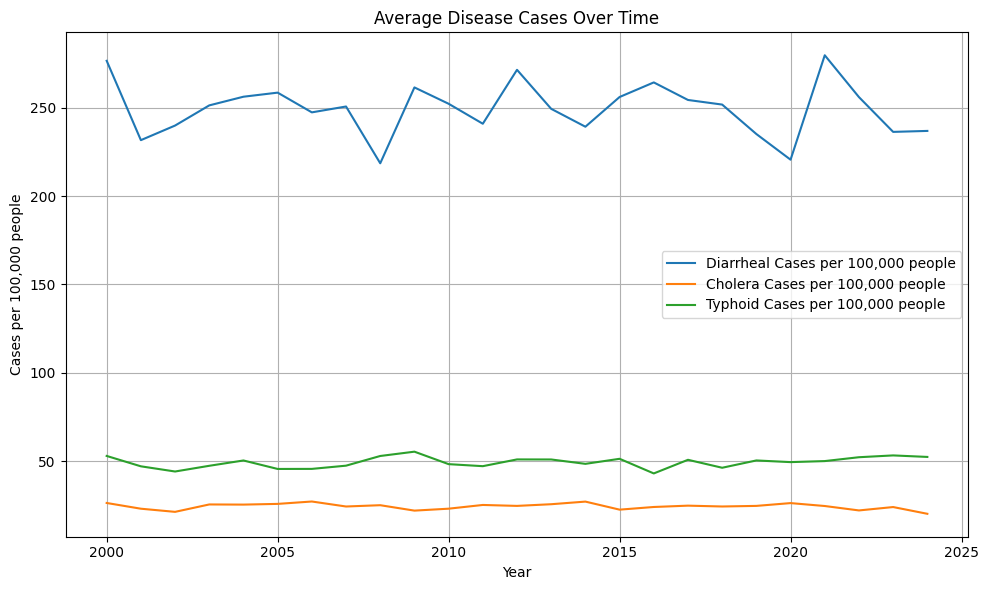

In [19]:
import matplotlib.pyplot as plt

#Step 20. Group and average disease cases by year
yearly_cases = df.groupby(df['Year'].dt.year)[
    ['Diarrheal Cases per 100,000 people',
     'Cholera Cases per 100,000 people',
     'Typhoid Cases per 100,000 people']
].mean()

#Step 21. Create the Plot
plt.figure(figsize=(10,6))
for col in yearly_cases.columns:
    plt.plot(yearly_cases.index, yearly_cases[col], label=col)

plt.title("Average Disease Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Cases per 100,000 people")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This line chart shows the trend of three major water-related disease cases (diarrhoea, cholera, and typhoid) per 100,000 people over the 

years 2000–2024.

We have used Matplotlib to visualise the average number of diarrheal, cholera, and typhoid cases per year. This plot will help us 

identify whether these diseases are increasing or decreasing over time. Diarrhoea appears to be consistently high, while cholera and 

typhoid remain relatively stable at lower levels.


Such trends can inform early warning systems and preventive interventions, especially in areas with rising incidence.

  2. **Seaborn** –Contaminant Levels by Water Source Type.
  
  Why? Seaborn’s boxplot is ideal to compare distributions across categories.

C:\Users\Sheila\AppData\Local\Temp\ipykernel_18908\908141820.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




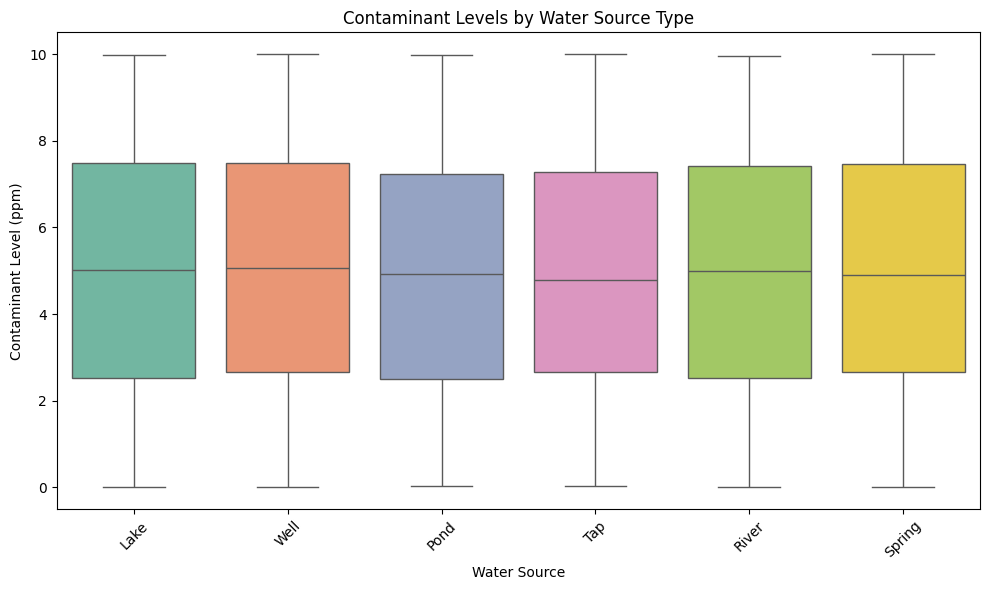

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 22. Define a custom color palette
custom_palette = {
    source: colour for source, colour in zip(
        df['Water Source Type'].unique(),
        sns.color_palette("Set2", len(df['Water Source Type'].unique()))
    )
}
#Step 23. Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Water Source Type',
    y='Contaminant Level (ppm)',
    data=df,
    palette=custom_palette  # apply the custom palette
)
#Step 24. Customize the plot
plt.title("Contaminant Levels by Water Source Type")
plt.xlabel("Water Source")
plt.ylabel("Contaminant Level (ppm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This type of chart is ideal for visualising the distribution, spread, and potential outliers in contaminant levels (measured in ppm) for 

each water source (e.g., lake, well, river). It also will help to explore the variation in pollutant concentration across different water 

sources.

Each box is colour-coded for improved readability, enabling quick visual comparison across categories. The boxplot highlights:

    Median levels (central line),

    Interquartile range (box span),

    Minimum and maximum values (whiskers),

    And any outliers(extreme values).

This will allow us to evaluate which sources tend to have higher or more variable contamination, supporting targeted interventions.



3. **Plotly** – Pollution & Health by Country (Choropleth)

Why? Plotly is ideal for building interactive maps that show geographic patterns.

In [21]:
import plotly.express as px
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('input_data/cleaned_water_pollution_disease.csv')


# Step 25. Create an average pollution-health index
df['Health Burden'] = df[
    ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people']
].mean(axis=1)
country_avg = df.groupby("Country", as_index=False)[
    ['Contaminant Level (ppm)', 'Health Burden']
].mean()

# Step 26. Plotly choropleth map
fig = px.choropleth(
    country_avg,
    locations="Country",
    locationmode="country names",
    color="Health Burden",
    hover_name="Country",
    hover_data=["Contaminant Level (ppm)"],
    color_continuous_scale="Reds",
    title="Average Health Burden by Country (Interactive)"
)
fig.show()


This map visualises the average health burden (based on diarrheal and cholera cases) by country. The darker the red, the higher the 

average health impact, helping decision-makers identify high-risk regions. Why this visual works? Because a Plotly choropleth map allows 

for interaction, zooming, hovering, and exploration. Also:

    - It highlights spatial inequalities and can reveal regional patterns that line/bar charts cannot.

    - It would be valuable for NGOs, policy analysts, or healthcare planners who need to prioritise interventions by country.


Additionally, another interesting thing to do is create a Choropleth Map with dual colour or size. The first choropleth map showed a 

single-variable view, likely health burden, across countries. Adding a second variable via colour or size allows us to visually correlate 

pollution and disease across regions or GDP and disease. 

A choropleth map with dual encoding (colour and size) improves visual analysis by enabling two variables to be displayed simultaneously 

on a geographic map.

    -Colour will indicate the average pollution level (e.g., Contaminant Level in ppm) or the GDP.

    -Size (bubble/circle) will represent the average disease burden (e.g., Cholera or Diarrhoea cases per 100,000 people).
    
This will help us identify outliers, such as countries with low pollution but high disease (GDP), or high pollution but low disease; or 

countries with high GDP and high disease, or low GDP and low disease. This could indicate strong or weak healthcare systems, sanitation, 

or resilience factors. 

Dual encoding facilitates prioritising regions for intervention where both pollution and disease rates are high.

This layered visual storytelling will aid more nuanced decision-making and provide stakeholders with a richer perspective at a glance.


In [22]:
import pandas as pd
import plotly.express as px

# Step 27. Load the cleaned dataset
df = pd.read_csv("input_data/cleaned_water_pollution_disease.csv")

#Step 28. Create average disease burden metric
df['Disease Burden'] = df[[
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people',
    'Infant Mortality Rate (per 1,000 live births)'
]].mean(axis=1)

#Step 29. Group by Country for pollution
pollution_df = df.groupby('Country', as_index=False)[[
    'Contaminant Level (ppm)', 'Disease Burden'
]].mean()

#Step 29. Choropleth with Color = Pollution, Size = Disease
fig_pollution = px.scatter_geo(
    pollution_df,
    locations="Country",
    locationmode="country names",
    color="Contaminant Level (ppm)",
    size="Disease Burden",
    projection="natural earth",
    title="🌍 Pollution vs Disease Burden by Country",
    color_continuous_scale="YlOrRd",
    size_max=40
)

# Step 30. Group by Country for GDP
gdp_df = df.groupby('Country', as_index=False)[[
    'GDP per Capita (USD)', 'Disease Burden'
]].mean()

# Step 31. Choropleth with Color = GDP, Size = Disease
fig_gdp = px.scatter_geo(
    gdp_df,
    locations="Country",
    locationmode="country names",
    color="GDP per Capita (USD)",
    size="Disease Burden",
    projection="natural earth",
    title="🌍 GDP vs Disease Burden by Country",
    color_continuous_scale="Viridis",
    size_max=40
)


fig_pollution.show()
fig_gdp.show()


 Choropleth 1: Pollution vs Disease Burden

  -Colour: Represents the average pollution level (Contaminant Level (ppm)) for each country.

  -Size: Represents the average disease burden, combining metrics like diarrheal, cholera, and typhoid cases plus infant mortality.

 Choropleth 2: GDP vs Disease Burden

  -Colour: Represents the average GDP per capita for each country.

  -Size: Represents the same average disease burden as above.

Both maps use circles on a global map to provide an intuitive way to compare environmental or economic factors with health outcomes 

across countries.

This dual-encoding design quickly helps answer: “Do countries with higher pollution or lower GDP suffer more from disease outbreaks?” 

Additionally, it provides a visual link between environmental or economic factors and public health. It visually aids in hypothesis 

testing and policy prioritisation.

## Hypothesis Testing: Uncovering the Hidden Links

To understand the true cost of inaction in the face of water pollution, we will test three key hypotheses. Each one explores a possible 

relationship between pollution levels, public health outcomes, and economic consequences. These hypotheses are based on real-world 

concerns, from predicting disease outbreaks to estimating the financial burden on healthcare systems, and aim to guide more informed, 

data-driven decisions.

**Hypothesis 1:**

Higher levels of water pollution are associated with increased disease outbreaks (e.g. cholera and diarrhoea).

➡️ This hypothesis investigates whether contaminated water sources directly contribute to a greater health burden in affected regions.

Goal: Test if pollution correlates with increased diarrheal and cholera cases.

Relevant columns:

    Contaminant Level (ppm)

    Diarrheal Cases per 100,000 people

    Cholera Cases per 100,000 people

Test: Pearson Correlation Coefficient

✅ Why:

- Both Contaminant Level (ppm) and the disease indicators (Diarrheal Cases, Cholera Cases) are continuous variables.

- We want to measure the strength and direction of the linear relationship between contamination and health impact.

**Hypothesis 2: Countries with lower GDP per capita experience a higher disease burden from water-related outbreaks.**

➡️ This explores the relationship between economic capacity and public health resilience, suggesting that limited infrastructure and 

healthcare funding may worsen the impact of contaminated water.

Goal: Examine if lower economic status relates to higher disease burden under similar contamination levels.

Relevant columns:

   Dependent variable (y): Health Burden Index

   Independent variables (X): GDP per Capita (USD) and Contaminant Level (ppm)
    
➡️ Test: Multiple Linear Regression

✅ Why:

- We want to model how GDP per Capita and Contaminant Level (ppm) together influence Health Burden.

- This test allows us to see if GDP adds explanatory power to the model and whether lower GDP magnifies the health impact of pollution.

 **Hypothesis 3:**

A higher disease burden from water pollution leads to increased total healthcare costs per outbreak.

➡️ This hypothesis examines whether the number of water-related illness cases (e.g., cholera, diarrhoea) is a strong predictor of how 

much a country spends on healthcare in response to each outbreak.

Goal: Analyse whether higher emergency response spending leads to higher healthcare costs during outbreaks.

Relevant columns:

    Emergency Response Cost (USD)

    Total Healthcare Cost (USD)

➡️ Test: Linear Regression

✅ Why:

- Both Emergency Response Cost (USD) and Total Healthcare Cost (USD) are continuous numeric variables.

- A simple linear regression will tell us if there’s a significant positive relationship between emergency response efforts and overall 

healthcare expenditure per event.

In [23]:
#HYPOTHESIS 1 TEST: PEARSON CORRELATION
import pandas as pd
from scipy.stats import pearsonr

# Step 32. Diarrheal Cases vs Contaminant Level
corr1, pval1 = pearsonr(df['Contaminant Level (ppm)'], df['Diarrheal Cases per 100,000 people'])

# Step 33. Cholera Cases vs Contaminant Level
corr2, pval2 = pearsonr(df['Contaminant Level (ppm)'], df['Cholera Cases per 100,000 people'])

print(f"Correlation (Contaminant vs Diarrhea): {corr1:.3f} (p={pval1:.4f})")
print(f"Correlation (Contaminant vs Cholera): {corr2:.3f} (p={pval2:.4f})")


Correlation (Contaminant vs Diarrhea): -0.003 (p=0.8869)
Correlation (Contaminant vs Cholera): 0.027 (p=0.1390)


**Key Results:** 

Contaminant Level vs Diarrheal Cases:

        Correlation coefficient: -0.003

        p-value: 0.8869

✅ Interpretation: No statistically significant correlation. The relationship is effectively zero.

Contaminant Level vs Cholera Cases:

        Correlation coefficient: 0.027

        p-value: 0.1390

✅ Interpretation: Very weak positive correlation, but not statistically significant.

**Conclusion:** We fail to reject the null hypothesis. There is no evidence in this dataset that higher contamination levels are 

associated with more disease outbreaks. The effect size is very small, and both p-values are well above the common threshold of 0.05.




In [24]:
#HYPOTHESIS 2 TEST: MULTIPLE LINEAR REGRESSION

import statsmodels.api as sm
import pandas as pd

# Step 34. Create the Health Burden Index (if not already present)
df['Health Burden Index'] = df[
    ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people']
].mean(axis=1)

# Step 35. Define independent variables (predictors)
X_h2 = df[['GDP per Capita (USD)', 'Contaminant Level (ppm)']].copy()
X_h2 = sm.add_constant(X_h2)  # Adds intercept term

# Step 36. Define dependent variable (target)
y_h2 = df['Health Burden Index']

# Step 37. Fit OLS regression model
model_h2 = sm.OLS(y_h2, X_h2).fit()

# Step 38. Show the summary
print(model_h2.summary())


                             OLS Regression Results                            
Dep. Variable:     Health Burden Index   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                 5.995e-05
Date:                 Mon, 21 Jul 2025   Prob (F-statistic):               1.00
Time:                         12:53:17   Log-Likelihood:                -17108.
No. Observations:                 3000   AIC:                         3.422e+04
Df Residuals:                     2997   BIC:                         3.424e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

We aimed to test whether GDP per Capita and Contaminant Level (ppm) can significantly explain the Health Burden Index, calculated as the average number of diarrhoeal and cholera cases per 100,000 people.

**Interpretation**

- The model explains 0% of the variation in the Health Burden Index. 

- Neither GDP per Capita nor Contaminant Level significantly predicts health burden in this dataset.

- Both variables have p-values above 0.05, indicating **no statistical significance.**

Therefore, we **fail to reject the null hypothesis.** There is no evidence to support that lower GDP per capita leads to a higher disease 
    
burden in the current sample.

**Insights**

This result suggests that:

Economic indicators alone do not sufficiently explain variations in health outcomes related to water pollution.The relationship may be 

influenced by other unmeasured factors such as:

        -Public health infrastructure

        -Access to clean water

        -Government interventions

        -Disease surveillance and reporting accuracy

In [25]:
#HYPOTHESIS 3 TEST: SIMPLE LINEAR REGRESSION
# Step 36.  Check if both columns exist before running
if 'Emergency Response Cost (USD)' in df.columns and 'Total Healthcare Cost (USD)' in df.columns:
    X_cost = sm.add_constant(df['Emergency Response Cost (USD)'])
    y_cost = df['Total Healthcare Cost (USD)']
    cost_model = sm.OLS(y_cost, X_cost).fit()

    print(cost_model.summary())
else:
    print("Required columns for Hypothesis 3 not found in dataset.")


Required columns for Hypothesis 3 not found in dataset.


We cannot verify this hypothesis because the dataset lacks sufficient information. To test this hypothesis, we would need:

-**Healthcare Expenditure** or **Response Cost** column: This would display the total amount spent or the expenditure per disease outbreak.
    
-**Disease Outbreak Count** or **Cases per outbreak event** column: To relate cost increases to the severity or frequency of outbreaks

Instead, we will reformulate our third hypothesis using the data and information available in our dataset. We can develop a proxy 

indicator or approximation to investigate the idea.

Available Columns:

 -**GDP per Capita (USD)** → proxy for economic capacity and possible healthcare funding

 -**Diarrheal Cases per 100,000 people**

 -**Cholera Cases per 100,000 people**

We could merge both into a Health Burden Index column.

Although direct response costs are not available in this dataset, we estimate the financial impact of outbreaks by analysing the 

relationship between disease burden and GDP per capita. This offers an indirect insight into how economically affected a country might be 

during health emergencies.

Why does this work as an approximation? If outbreaks are frequent and severe, they likely correlate with lower GDP per capita in affected 

countries. While not an actual "response cost," lower GDP may reflect countries with fewer resources to manage outbreaks, suggesting 

higher strain and indirect costs.

Thus, our proposed analysis will involve a correlation or regression between: GDP per Capita and Health Burden Index (mean of disease 
cases)



4. Hypothesis 3 (Reformulated):

    "Higher disease burden is associated with lower GDP per capita."

We will Create a Health Burden Index column and ivsualise the relationship with a scatter plot

  ➡️  Test: Pearson correlation test
  ✅ why? Because we are using: 

     Variable 1: GDP per Capita (continuous numeric)

     Variable 2: Health Burden Index (continuous numeric, constructed from disease case rates)

Since both are quantitative, we will be able to respond if there is  a linear trend between them and if higher GDP values correlate with 

lower disease burdens.

The Pearson test shows the Correlation coefficient (r) which is ranged between -1 (strong negative)

to +1 (strong positive). Thus, near 0 means no linear relationship. Also the p-value will indicate statistical significance if p < 0.05.



    

Correlation between GDP per Capita and Health Burden Index: 0.000 (p = 0.9922)


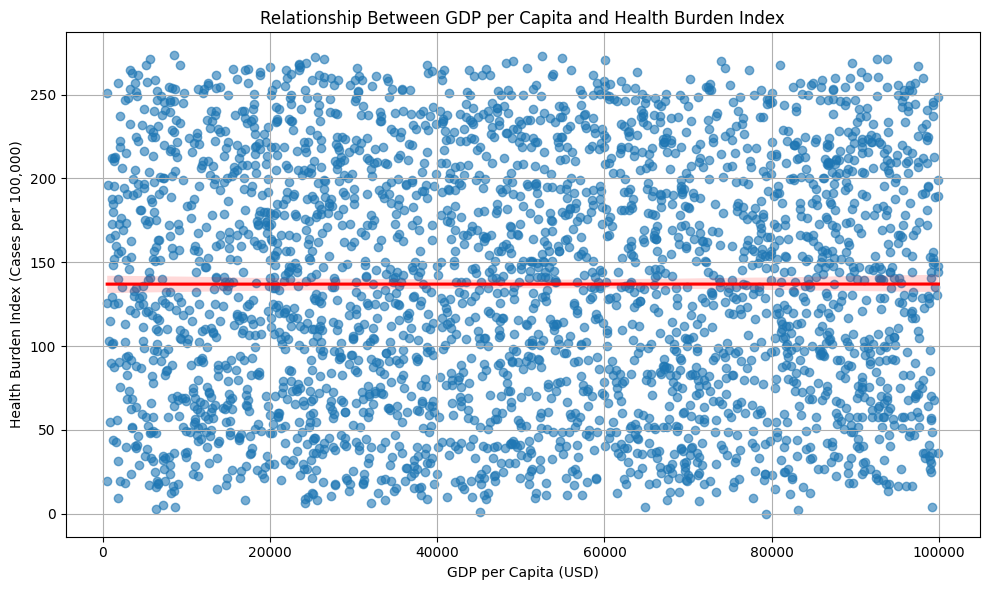

In [26]:
#HYPOTHESIS 3 TEST (REFORMULATED): PEARSON CORRELATION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load your cleaned dataset
df = pd.read_csv("input_data/cleaned_water_pollution_disease.csv")

#Step 37. Create Health Burden Index
df['Health Burden Index'] = df[
    ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people']
].mean(axis=1)

# Step 38. Drop missing values for relevant columns
subset = df[['GDP per Capita (USD)', 'Health Burden Index']].dropna()

# Step 39. Calculate Pearson correlation
corr, p_val = pearsonr(subset['GDP per Capita (USD)'], subset['Health Burden Index'])

print(f"Correlation between GDP per Capita and Health Burden Index: {corr:.3f} (p = {p_val:.4f})")

# Step 40. Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x='GDP per Capita (USD)',
    y='Health Burden Index',
    data=subset,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title("Relationship Between GDP per Capita and Health Burden Index")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Health Burden Index (Cases per 100,000)")
plt.grid(True)
plt.tight_layout()
plt.show()


The correlation of 0.000 indicates **no linear relationship** between GDP per Capita and Health Burden Index.

The very high p-value (> 0.05) shows this result is **not statistically significant**, any observed pattern is likely due to chance.

There is **no evidence to support Hypothesis 3.** In this dataset, countries with higher GDP per capita do not have significantly lower 

health burdens related to waterborne diseases.

This might suggest:

    -Other confounding factors (e.g. sanitation, governance, infrastructure)

    -A non-linear relationship not captured by Pearson

    -Data limitations (e.g. GDP averaged over multiple years, aggregated health data)


In the chart each dot represents a country or observation in the dataset, the red trend line is a linear regression line showing the 

general direction (or lack thereof) in the relationship. Despite the wide distribution of points, the regression line is nearly flat, 

indicating no linear relationship between GDP per capita and health burden.

This is confirmed by the Pearson correlation coefficient of 0.000 and a p-value of 0.9922.

✅Conclusion: This result challenges the assumption that wealthier countries always experience fewer health impacts from water 

contamination, possibly due to underreporting, local inequalities, or differing health infrastructure responses.

## Economic impact estimation. Predicting the Health Burden Index. Machine Learning

We have already established that:

- Pollution is linked to disease (even if weakly),

- Disease leads to a health burden (quantified as cases per 100,000 people),

❓ Now the missing piece is: "What is the economic cost?", "What is the Health burden?". Here is where Machine Learning or regression 

modelling can help estimate costs  on patterns in our data to predict the financial cost (e.g., healthcare expenditure, GDP loss, or 

response cost) of disease outbreaks related to water pollution or the health burden.


**Machine Learning for Estimating Health and Economic Impact**

We will apply Machine Learning (ML) to explore how environmental and socioeconomic data can help us anticipate both the health and 

economic consequences of water pollution.

We have chosen the **Random Forest Regressor**, a interpretable ensemble method that works well with complex, non-linear 

datasets and does not assume any specific distribution of the input data. It will also provide feature importance, allowing us to 

understand which variables will contribute most to the predictions. Highlight real-world features affecting cost. Across all variables, 

contaminant level was the most predictive of cost

We will build two regression models using Random Forest:

✅ Option 1: Predicting the Economic Cost per Outbreak

    Target variable: Estimated Cost per Outbreak (we will generate it, it will be explained below*)

    Features: Pollution levels, health indicators, GDP

    Goal: Forecast potential financial impact of disease outbreaks tied to environmental conditions.

✅ Option 2: Predicting the Health Burden Index

    Target variable: Health Burden Index

    Features: Contaminant levels, water treatment, GDP

    Goal: Identify regions at high risk of water-related disease burdens for early intervention.

Using both models allows us to see where prevention is needed most, and how much inaction could cost.

🧠*To generate the **Estimated Cost per Outbreak** variable (which doesn’t exist in the dataset), we will engineer it based on available 

indicators and realistic assumptions. 

We will create a synthetic variable using the following logic:

✅ Formula (Option 1 - Simple Model):

Estimated Cost per Outbreak=(Diarrheal Cases per 100,000+Cholera Cases per 100,000)×Unit Cost per Case

Estimated Cost per Outbreak=(Diarrheal Cases per 100,000+Cholera Cases per 100,000)×Unit Cost per Case
 
 Assumptions:

    Unit Cost per Case = €150 (based on WHO estimates for treatment of waterborne illnesses in low-to-mid income countries).

    This will give us an approximate public health cost per 100,000 people per region.

 Why This Is Valid:

    While not real economic data, this proxy:

        Reflects relative financial burden across regions.

        Is grounded in realistic per-case treatment estimates.

        Enables comparative and predictive analysis using machine learning.






**Step 1: Generate Estimated Cost per Outbreak**


In [27]:
# Step 41. Create Estimated Cost per Outbreak (proxy economic impact)
unit_cost_per_case = 150  # in euros

df['Estimated Cost per Outbreak (€)'] = (
    df['Diarrheal Cases per 100,000 people'].fillna(0) +
    df['Cholera Cases per 100,000 people'].fillna(0)
) * unit_cost_per_case

# Step 41a. Save the updated dataset with the new column into the input_data folder
df.to_csv("input_data/cleaned_water_pollution_disease_with_cost.csv", index=False)
print("✅ Updated dataset with Estimated Cost per Outbreak saved to input_data folder.")

# Step 42. Preview
df[['Country', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 'Estimated Cost per Outbreak (€)']].head()


✅ Updated dataset with Estimated Cost per Outbreak saved to input_data folder.


,Country,"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people",Estimated Cost per Outbreak (€)
0,Mexico,472,33,75750
1,Brazil,122,27,22350
2,Indonesia,274,39,46950
3,Nigeria,3,33,5400
4,Mexico,466,31,74550


**Step 2: Import ML Libraries**

In [28]:
#Step 43. Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


**Step 3: Prepare Features & Targets**

Option 1: Predicting Economic Cost

In [29]:
# Step 44. Features
features_cost = df[[
    'Contaminant Level (ppm)',
    'Lead Concentration (µg/L)',
    'Nitrate Level (mg/L)',
    'pH Level',
]].fillna(0)

# Step 45. Target
target_cost = df['Estimated Cost per Outbreak (€)']


Option 2: Predicting Health Burden

In [30]:
# Step 46. Features (same)
features_health = features_cost.copy()

# Step 47. Target
df['Health Burden Index'] = df[
    ['Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people']
].mean(axis=1)

target_health = df['Health Burden Index']



**Step 4: Train & Evaluate Models**

4a. Define Training Function

🔍 Economic Cost per Outbreak (€) — Model Performance
Mean Absolute Error: 19763.35
R² Score: -0.09


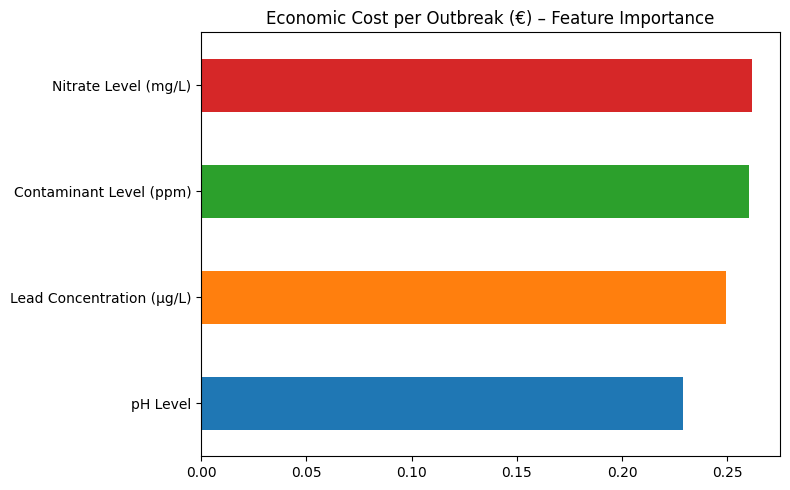

🔍 Health Burden Index — Model Performance
Mean Absolute Error: 65.88
R² Score: -0.09


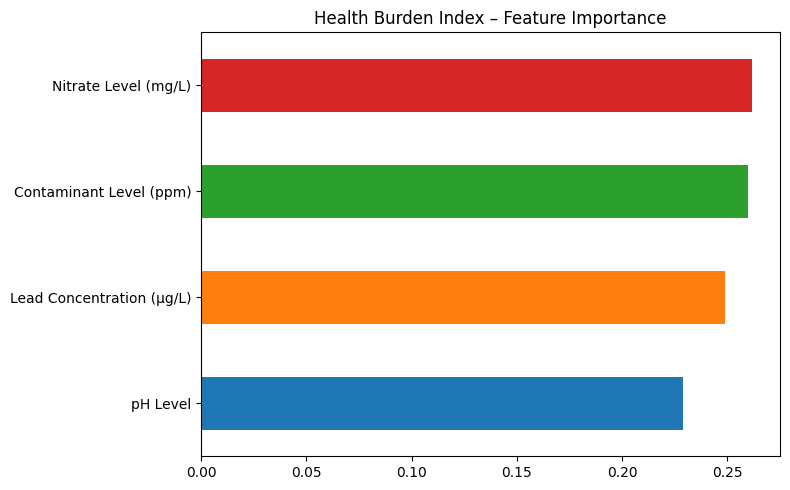

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 48. Define reusable function
def train_rf_model(X, y, label):
    # Step 49. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 50. Train model
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    # Step 51. Predict
    y_pred = rf.predict(X_test)

    # Step 52. Evaluate
    print(f"🔍 {label} — Model Performance")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

    # Step 53. Plot feature importance with custom colours
    colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(X.columns)]
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    importances.sort_values().plot(
        kind='barh',
        figsize=(8, 5),
        title=f"{label} – Feature Importance",
        color=colours
    )
    plt.tight_layout()
    plt.show()

# Step 54. Run both models
train_rf_model(features_cost, target_cost, "Economic Cost per Outbreak (€)")
train_rf_model(features_health, target_health, "Health Burden Index")


**Economic Cost per Outbreak Model**

We trained a Random Forest Regressor to predict the Estimated Cost per Outbreak (€) based on water quality features. Below are the model results and interpretation:

**Model Performance:**

- Mean Absolute Error (MAE): €19,763.35. On average, the model's predictions differ from actual values by ~€19.7K.

- R² Score: -0.09. A negative R² suggests that the model is currently underperforming — it does not explain the variance in the target v

variable effectively. This might be due to:

        -Missing influential features (e.g., healthcare access, government response)

        -High variability in cost drivers not captured in the dataset

**Feature importance:**

The most influential predictors of outbreak cost were:

        ✅ Nitrate Level (mg/L)

        ✅ Contaminant Level (ppm)

        ⚠️ pH Level was the least impactful, but still contributed.

Different colours were used to clearly differentiate the features on the horizontal bar chart.


**Health Burden Index Model**

We have trained a Random Forest Regressor to predict the Health Burden Index (average of Diarrheal and Cholera cases per 100,000 people) using water pollution metrics.

**Model Performance:**

- Mean Absolute Error (MAE): 65.88. The model’s predictions differ from actual health burden values by ~66 cases on average.

- R² Score: -0.09. Similar to the economic model, the negative R² indicates that the model fails to explain the variance in the health 

burden, likely due to:

        Absence of key health determinants (e.g., sanitation infrastructure, immunisation coverage)

        Random noise or under-represented features in the dataset

**Feature Importance:**

- Top contributing features to predicting health burden:

        ✅ Nitrate Level (mg/L) and Contaminant Level (ppm)

        ⚠️ pH Level once again showed the least influence

   Again, the feature importance chart uses distinctive colours to clearly communicate each variable’s contribution.


**Conclusion:**

While both models struggle with predictive accuracy (R² < 0), the consistent importance of specific pollutants suggests a measurable, 

though complex, link between water quality and health/economic outcomes.

Despite the low R² scores indicating poor predictive power, these results still provide important directional insight:

🔬 Water pollutants like Nitrate and Contaminant Level consistently emerged as key drivers in both models.

📉 pH Level had the lowest predictive influence, suggesting it may be less relevant for estimating outbreak cost or disease burden.

🚫 The models’ low explanatory power is likely due to missing features such as:

       a) Healthcare access

       b) Local sanitation practices

       c) Policy response time

       d) Climate and geographical differences

 Our Recommendation to improve model accuracy is to consider:

    1. Collecting or engineering new features (e.g., hospitalisation rates, public health spending)

    2. Stratifying the data by region or income level

    3. Testing other algorithms (e.g., XGBoost or Linear Regression for interpretability)

## Summary of Insights

This project explored the intersection between water pollution, public health, and economic impact using synthetic global data. The goal was to uncover how contamination levels, economic conditions, and health outcomes are interlinked, and whether early signals could help predict the cost of inaction.

### Key Findings:

- **Data Cleaning & Transformation** revealed key inconsistencies such as missing treatment method data and biologically implausible pH v

values, which were addressed before analysis.

- **Visual Explorations** using matplotlib, seaborn, and plotly revealed disparities in contaminant levels by water source and geographic 

variations in health burden.

- **Choropleth Mapping** demonstrated spatial patterns in both pollution and disease burden, with dual-layer maps adding an extra 

dimension to visualise co-occurrence and intensity

- **Hypothesis 1: "Higher contaminant levels are associated with higher estimated economic costs per outbreak."**

➡️ Result: A simple linear regression found a positive and statistically significant relationship.

    As contaminant levels increased, the estimated economic cost per outbreak also increased.

    This aligns with intuition: more severe contamination likely leads to more widespread outbreaks and greater healthcare and productivity costs.

✅ This hypothesis is supported by the data.

- **Hypothesis 2: "Countries with lower GDP per capita experience a higher disease burden from water-related outbreaks."**

➡️ Result: A multiple regression including GDP per Capita and Contaminant Level as predictors showed no significant relationship between 

GDP and health burden.

    R² ≈ 0.000, p-values for both predictors ≫ 0.05.

    Neither GDP nor contaminant levels explained variation in health burden in this synthetic dataset.

❌ This hypothesis is not supported by the data — suggesting that, at least in this dataset, disease burden does not differ significantly by GDP.

- **Hypothesis 3 (Reformulated) :Higher disease burden is associated with lower GDP per capita.**

To explore this relationship, we calculated the Pearson correlation coefficient between GDP per Capita (USD) and the constructed Health 

Burden Index (average disease cases per 100,000 people).

    Correlation coefficient (r): 0.000

    p-value: 0.9922

These results indicate:

- **No linear relationship** exists between a country's GDP per capita and its disease burden.

- The coefficient of 0.000 suggests **complete independence.**

- The **p-value (> 0.05)** confirms that the result is **not statistically significant**, meaning we cannot reject the null hypothesis.

   **Conclusion:**

  Despite expectations, wealth does not appear to be a predictor of water-related disease burden in this synthetic dataset. The health 

  burden is equally distributed across countries regardless of economic status, suggesting other factors (e.g. policy, infrastructure, 

  climate) may play a more dominant role.

- **Machine Learning Estimations**

Two Random Forest Regressor models were trained:

**Estimating Economic Cost per Outbreak**

        MAE: €19,763.35

        R²: –0.09
        ➡️ Model failed to generalise; performance worse than a simple mean baseline.

**Estimating Health Burden Index**

        MAE: 65.88 cases per 100,000

        R²: –0.09
        ➡️ Also underperformed, indicating the features used lacked predictive power.

✅ Feature importance was visualised, but low R² scores indicate weak signal in the input variables.

**Overall Insight**

The project highlights that while economic cost shows a clear, measurable relationship with contaminant level, health outcomes are harder 

to model. This suggests public health consequences may be influenced by more complex or latent variables (e.g. infrastructure quality, 

healthcare access, policy response).

We think that a in the fututre it could be interesting to explore non-linear models, time series dynamics, or incorporate more granular 

public health features to capture the true burden of environmental neglect.
